In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('merged_data.xlsx')

In [3]:
df.head()

,year,system,system_name,school,school_name,lg_ineligible,school_pool,grade_band_3-5,grade_band_6-8,grade_band_9-12,...,economically_disadvantaged_pct,homeless_pct,limited_english_proficient_pct,male_pct,migrant_pct,military_pct,multirace_pct,native_american_pct,students_with_disabilities_pct,white_pct
0,2023,10,Anderson County,2,Anderson County High School,0,HS,N,N,Y,...,21.0,2.5,2.5,54.0,NaN,NaN,2.5,2.5,15.0,93.0
1,2023,10,Anderson County,5,Andersonville Elementary,0,K8,Y,N,N,...,27.0,2.5,2.5,49.0,NaN,NaN,5.0,2.5,20.0,92.0
2,2023,10,Anderson County,10,Briceville Elementary,0,K8,Y,N,N,...,54.0,2.5,NaN,48.0,NaN,NaN,2.5,2.5,24.0,95.0
3,2023,10,Anderson County,15,Claxton Elementary,0,K8,Y,N,N,...,44.0,2.5,9.0,50.0,NaN,NaN,14.0,NaN,20.0,82.0
4,2023,10,Anderson County,20,Clinton Middle School,0,K8,N,Y,N,...,36.0,2.5,2.5,50.0,NaN,NaN,9.0,2.5,14.0,87.0


In [4]:
df = df.replace('<5%', 2.5)
df = df.replace('>95%', 97.5)

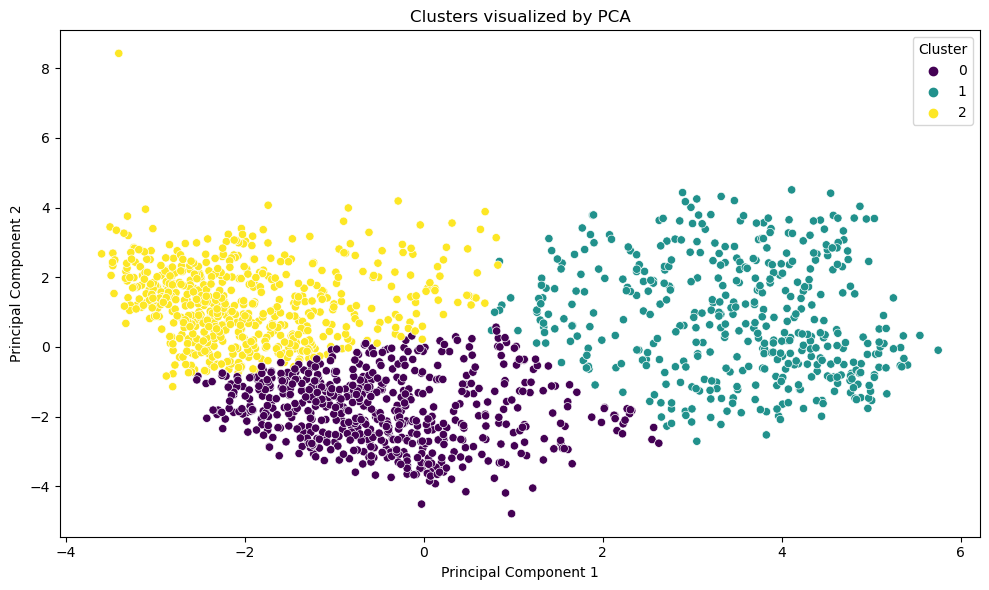

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_data.xlsx'  # Adjust the path if necessary
df = pd.read_excel(file_path)

# Drop non-numeric columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values by imputing with the mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df_numeric)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(dataset_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters visualized by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


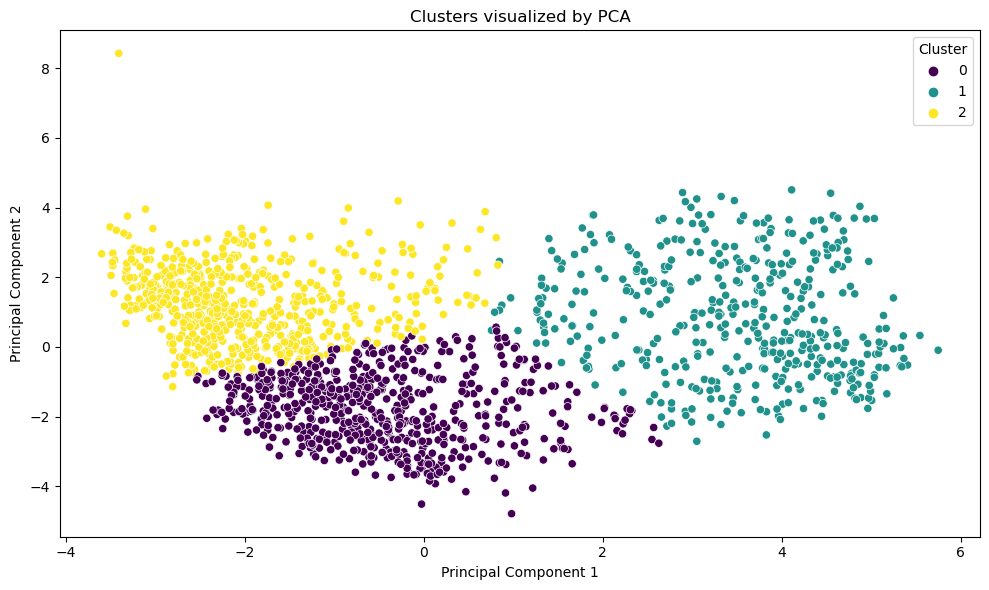

     year      system       school  lg_ineligible  ach_score  growth_score  \
0  2023.0  489.871632    72.383518            0.0   3.198098      1.824089   
1  2023.0  560.324263  2627.195011            0.0   1.620635      3.129252   
2  2023.0  543.699029   135.025890            0.0   4.442880      4.448220   

   growth25_score  ach_score_weighted  growth_score_weighted  ach_weight  ...  \
0        2.541790            1.594136               0.697781         0.5  ...   
1        3.720294            0.808390               1.211111         0.5  ...   
2        3.988938            2.219256               1.699191         0.5  ...   

   economically_disadvantaged_pct  homeless_pct  \
0                       31.422345      3.293924   
1                       55.641723      3.299036   
2                       21.863258      2.789493   

   limited_english_proficient_pct   male_pct  migrant_pct  military_pct  \
0                        5.251933  51.472266     2.528087      3.325233   
1      

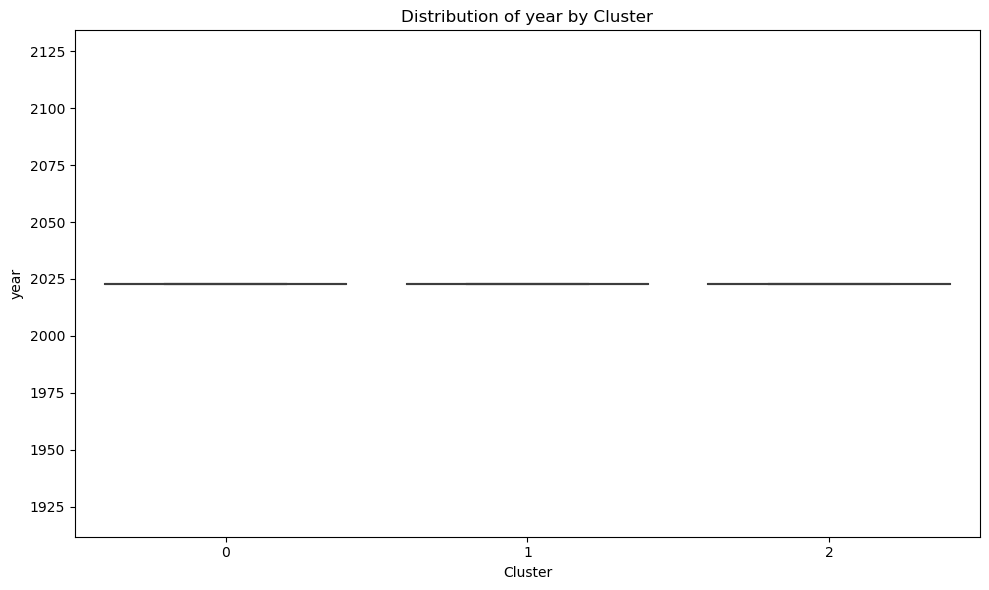

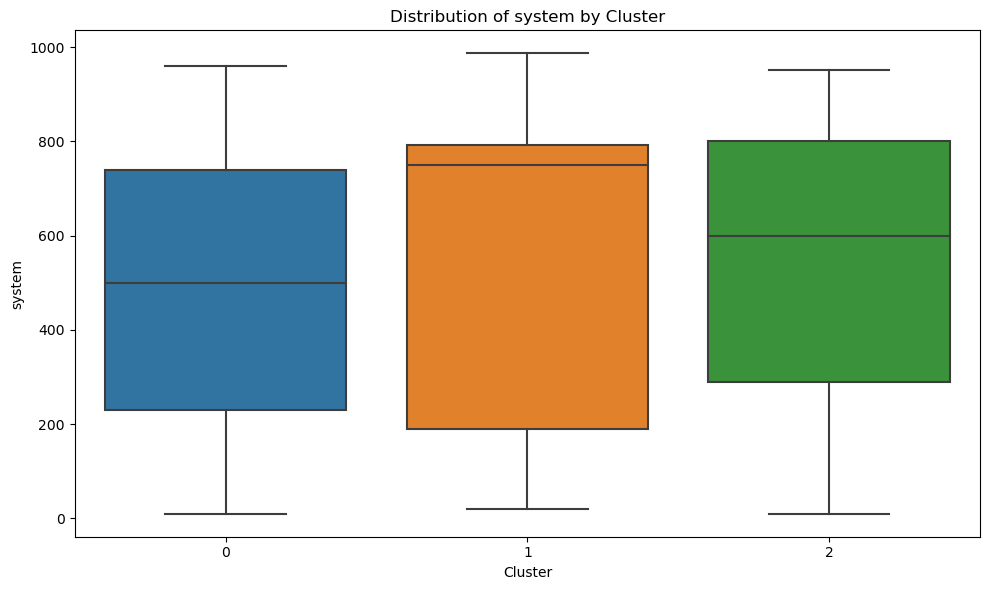

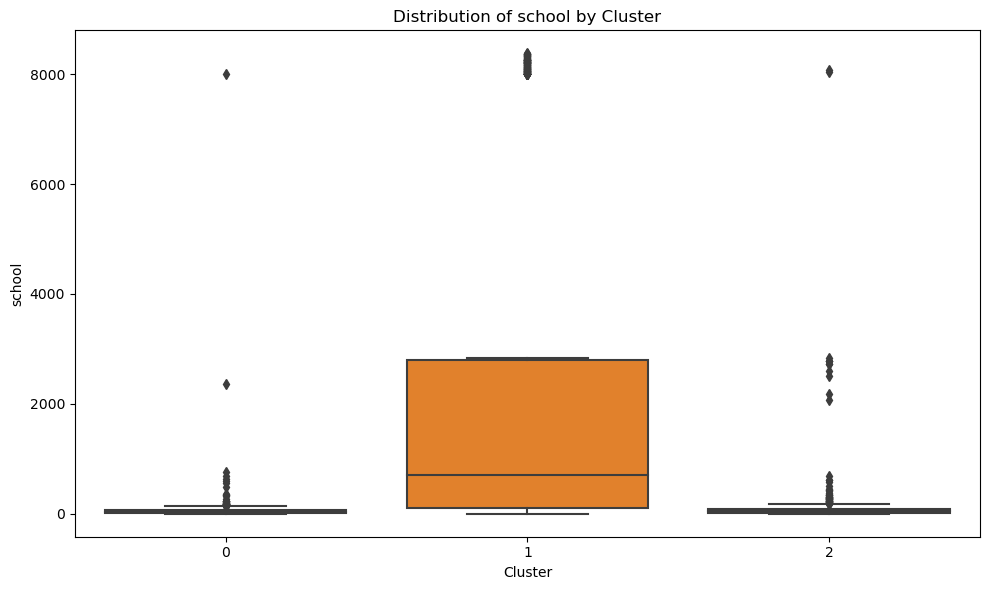

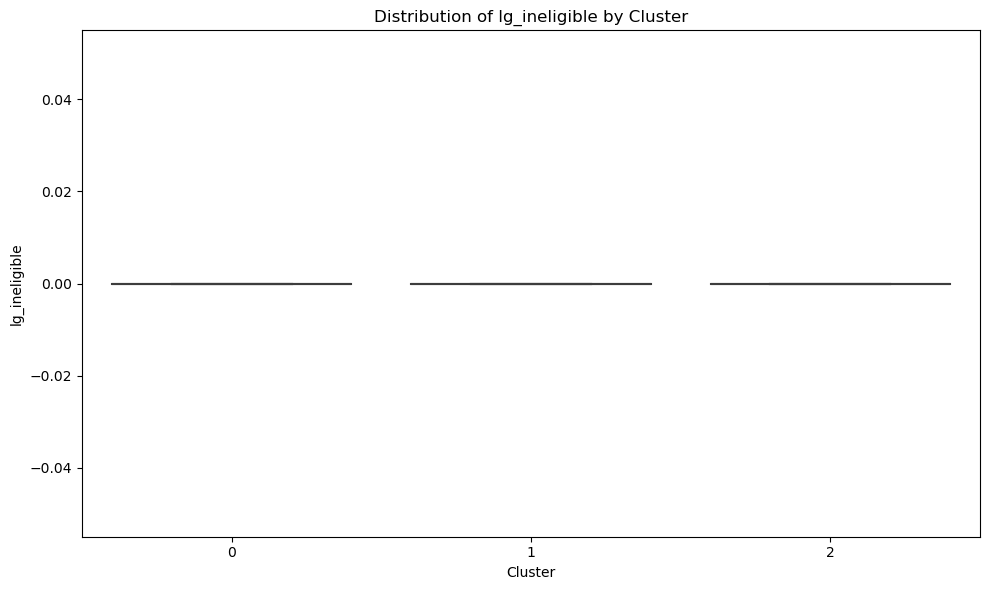

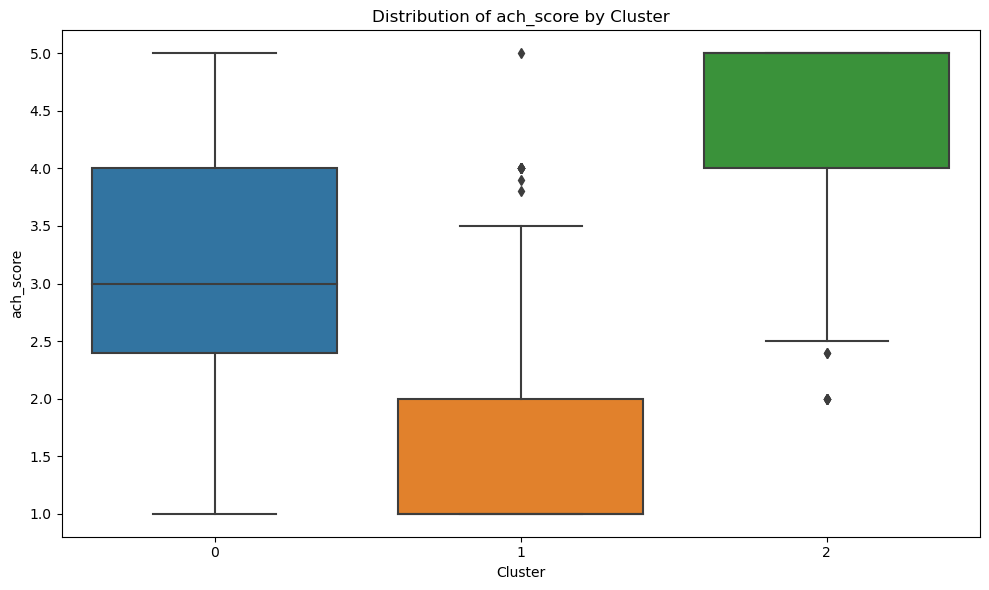

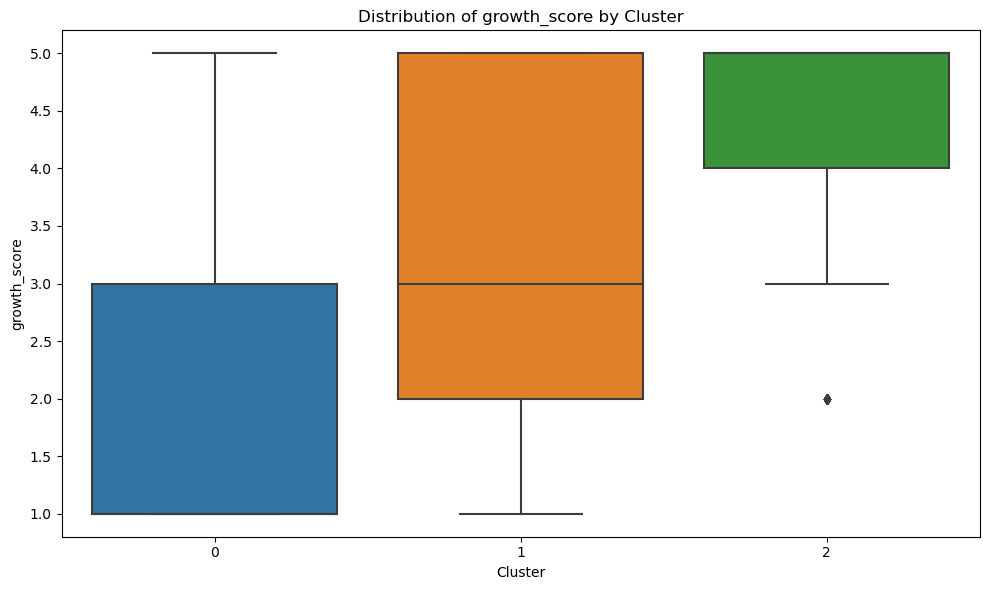

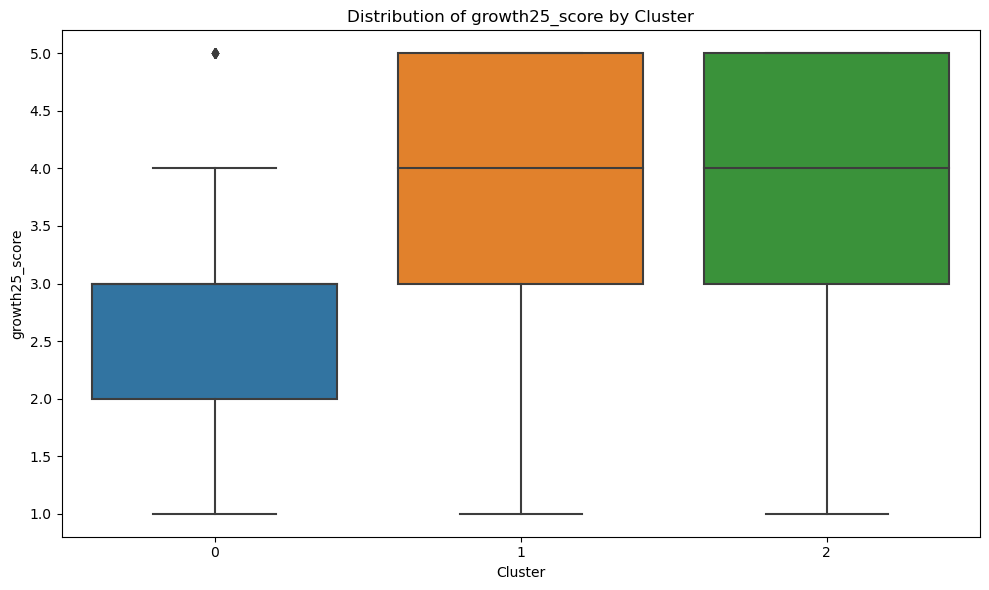

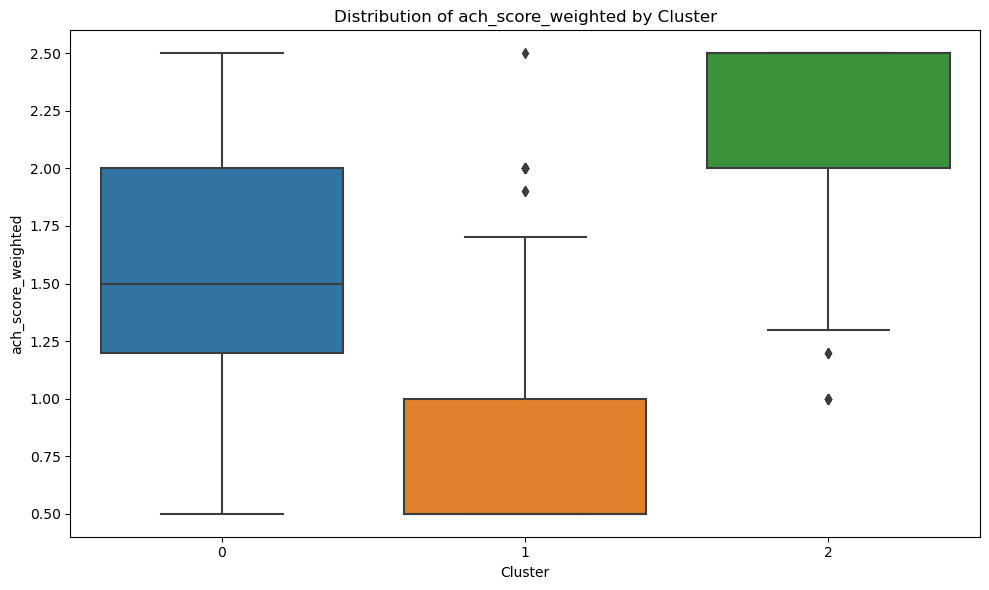

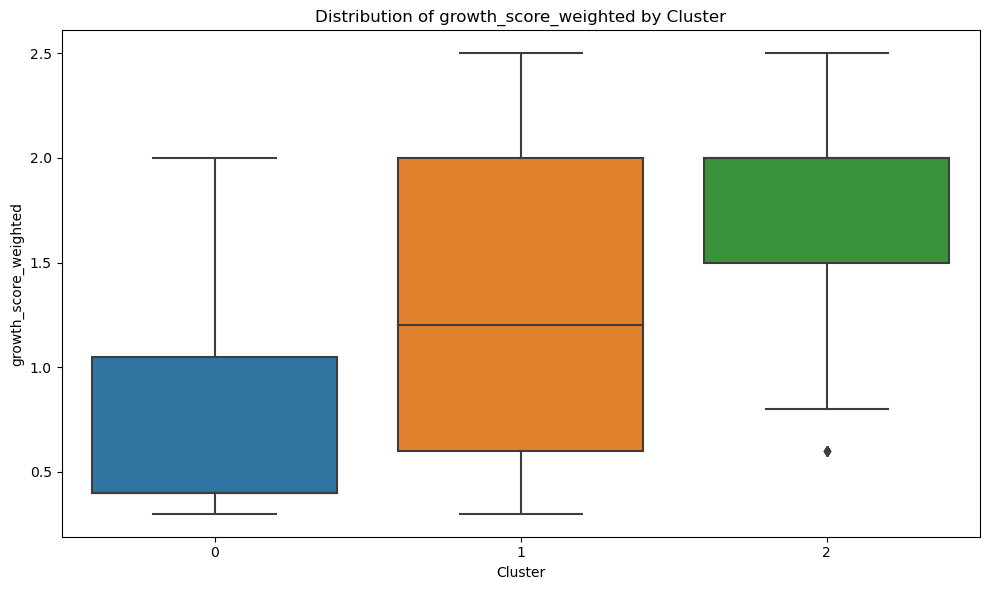

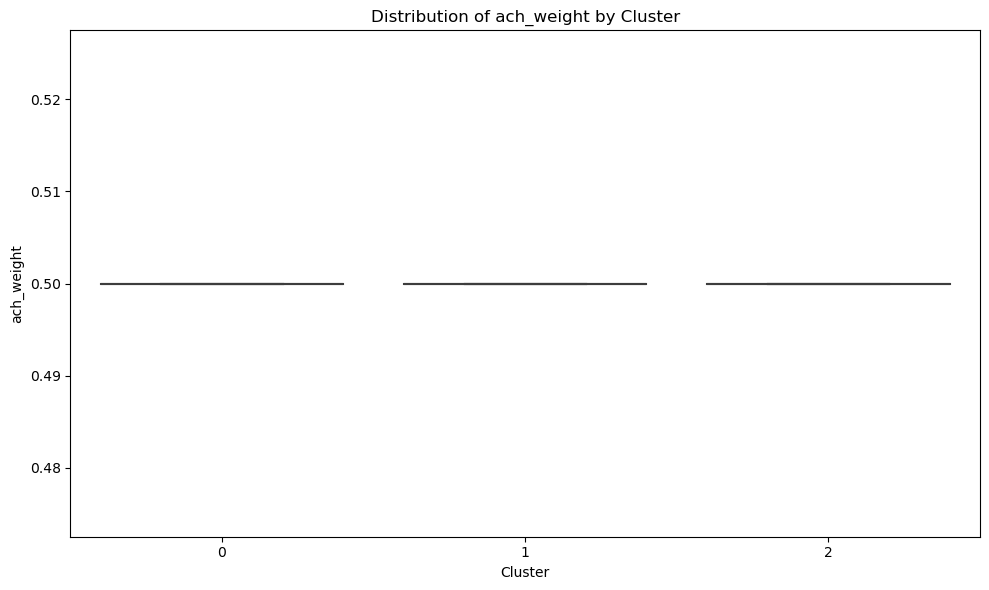

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_data.xlsx'  # Adjust the path if necessary
df = pd.read_excel(file_path)

# Drop non-numeric columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values by imputing with the mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df_numeric)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(dataset_scaled)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels

# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters visualized by PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Analyze cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=df_numeric.columns)
print(cluster_centers_df)

# Profile clusters
df_numeric['Cluster'] = labels
cluster_profile = df_numeric.groupby('Cluster').mean()
print(cluster_profile)

# Visualize feature distributions
key_features = df_numeric.columns[:10]  # Adjust as needed
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_numeric)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()


In [19]:
df3d = df[['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']]
df3d

,overall_success_rate_all_students,economically_disadvantaged_pct,black_hispanic_native_american_pct
0,34.2,21.0,6.0
1,52.2,27.0,7.0
2,30.5,54.0,5.0
3,33.6,44.0,17.0
4,30.1,36.0,12.0
...,...,...,...
1685,23.1,30.0,64.0
1686,37,26.0,94.0
1687,14.1,82.0,97.5
1688,23.1,58.0,86.0


In [21]:
df3d = df3d.replace('<5%', 2.5)
df3d = df3d.replace('>95%', 97.5)

In [22]:
df3d['overall_success_rate_all_students'] = df3d['overall_success_rate_all_students'].astype(float)

In [23]:
df3d.dtypes

overall_success_rate_all_students     float64
economically_disadvantaged_pct        float64
black_hispanic_native_american_pct    float64
dtype: object

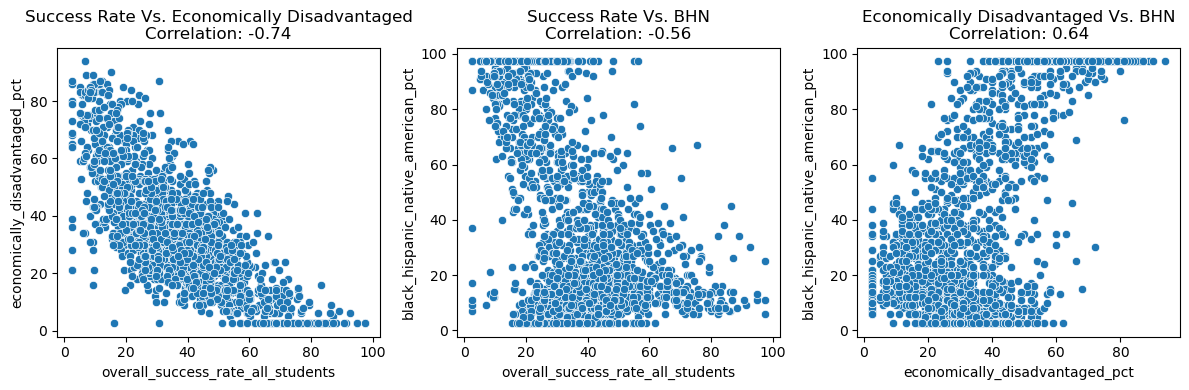

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Correlation calculation
success_econ_disadv_correlation = df3d['overall_success_rate_all_students'].corr(df3d['economically_disadvantaged_pct'])
success_bhn_correlation = df3d['overall_success_rate_all_students'].corr(df3d['black_hispanic_native_american_pct'])
econ_disadv_bhn_correlation = df3d['economically_disadvantaged_pct'].corr(df3d['black_hispanic_native_american_pct'])

# Plotting the scatter plots with correlation coefficient in the title
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title(f"Success Rate Vs. Economically Disadvantaged\nCorrelation: {success_econ_disadv_correlation:.2f}")
sns.scatterplot(x="overall_success_rate_all_students", y="economically_disadvantaged_pct", data=df3d)

plt.subplot(1, 3, 2)
plt.title(f"Success Rate Vs. BHN\nCorrelation: {success_bhn_correlation:.2f}")
sns.scatterplot(x="overall_success_rate_all_students", y="black_hispanic_native_american_pct", data=df3d)

plt.subplot(1, 3, 3)
plt.title(f"Economically Disadvantaged Vs. BHN\nCorrelation: {econ_disadv_bhn_correlation:.2f}")
sns.scatterplot(x="economically_disadvantaged_pct", y="black_hispanic_native_american_pct", data=df3d)

plt.tight_layout()
plt.show()


In [25]:
df3d[['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']].describe()

,overall_success_rate_all_students,economically_disadvantaged_pct,black_hispanic_native_american_pct
count,1690.000000,1688.000000,1687.000000
mean,36.676331,34.246742,37.774452
std,17.828993,19.160307,33.037610
min,2.500000,2.500000,2.500000
25%,24.200000,21.000000,10.000000
50%,35.500000,32.000000,24.000000
75%,47.100000,44.000000,64.000000
max,97.500000,94.000000,97.500000


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a subset of the DataFrame with the specified columns for 3D analysis
df3d = df3d[['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']]

# Handle missing values by imputing with the mean
df3d.fillna(df3d.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
dataset_scaled_3d = scaler.fit_transform(df3d)

# Apply K-means clustering
kmeans_3d = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_3d.fit(dataset_scaled_3d)

# Get cluster labels
labels_3d = kmeans_3d.labels_

# Add cluster labels to the original 3D DataFrame
df3d['Cluster'] = labels_3d

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df3d['overall_success_rate_all_students'],
    df3d['economically_disadvantaged_pct'],
    df3d['black_hispanic_native_american_pct'],
    c=df3d['Cluster'],
    cmap='viridis'
)

ax.set_title('3D Clustering of Schools')
ax.set_xlabel('Overall Success Rate (All Students)')
ax.set_ylabel('Economically Disadvantaged %')
ax.set_zlabel('Black/Hispanic/Native American %')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_33039/3971181507.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3d.fillna(df3d.mean(), inplace=True)


ValueError: could not convert string to float: '<5%'

/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_33039/2785436636.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3d.replace('<5%', 2.5, inplace=True)


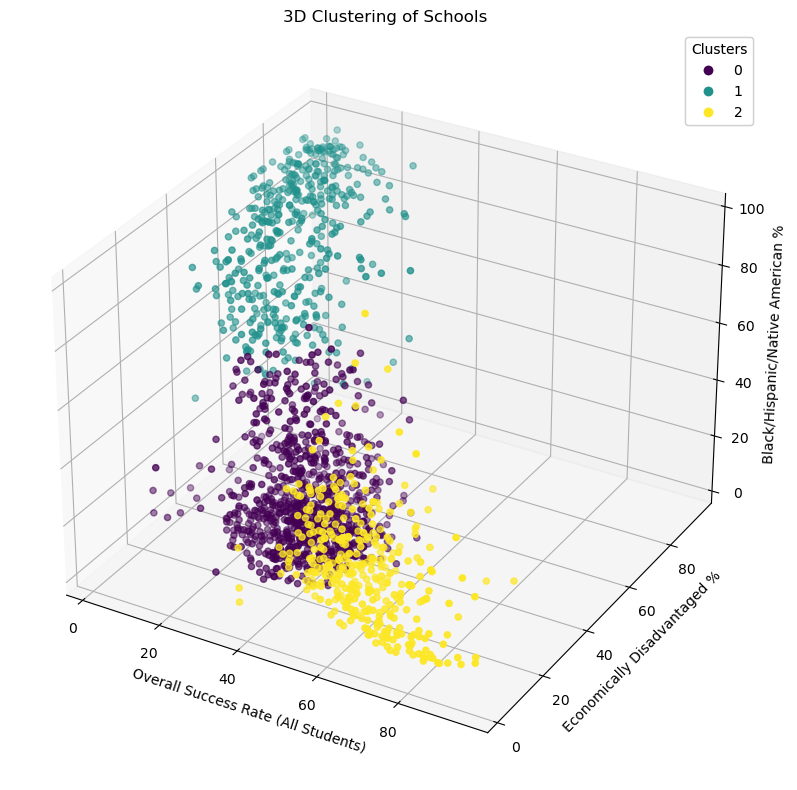

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = 'merged_data.xlsx'
df = pd.read_excel(file_path)

# Creating a subset of the DataFrame with the specified columns for 3D analysis
df3d = df[['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']]

# Handle non-numeric values, assuming '<5%' can be replaced with a value like 2.5
df3d.replace('<5%', 2.5, inplace=True)

# Convert columns to numeric
df3d = df3d.apply(pd.to_numeric, errors='coerce')

# Handle missing values by imputing with the mean
df3d.fillna(df3d.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
dataset_scaled_3d = scaler.fit_transform(df3d)

# Apply K-means clustering
kmeans_3d = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_3d.fit(dataset_scaled_3d)

# Get cluster labels
labels_3d = kmeans_3d.labels_

# Add cluster labels to the original 3D DataFrame
df3d['Cluster'] = labels_3d

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df3d['overall_success_rate_all_students'],
    df3d['economically_disadvantaged_pct'],
    df3d['black_hispanic_native_american_pct'],
    c=df3d['Cluster'],
    cmap='viridis'
)

ax.set_title('3D Clustering of Schools')
ax.set_xlabel('Overall Success Rate (All Students)')
ax.set_ylabel('Economically Disadvantaged %')
ax.set_zlabel('Black/Hispanic/Native American %')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


/var/folders/28/95jgwkdx0176zhxft7ldgnjw0000gn/T/ipykernel_33039/575827059.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3d.replace('<5%', 2.5, inplace=True)


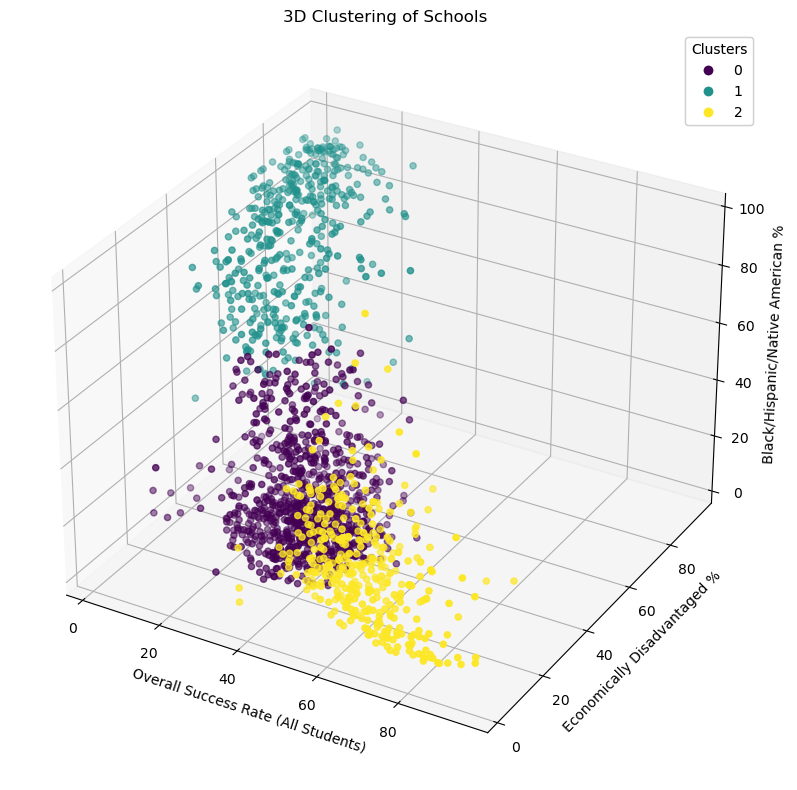

Cluster Centers:
   overall_success_rate_all_students  economically_disadvantaged_pct  \
0                          35.593967                       31.725534   
1                          18.167800                       56.764172   
2                          61.514356                       12.888871   

   black_hispanic_native_american_pct  
0                           20.249774  
1                           86.488151  
2                           21.376389  
Cluster Profiles:
         overall_success_rate_all_students  economically_disadvantaged_pct  \
Cluster                                                                      
0                                35.571186                       31.827119   
1                                18.167800                       56.764172   
2                                61.284902                       12.848883   

         black_hispanic_native_american_pct  
Cluster                                      
0                                

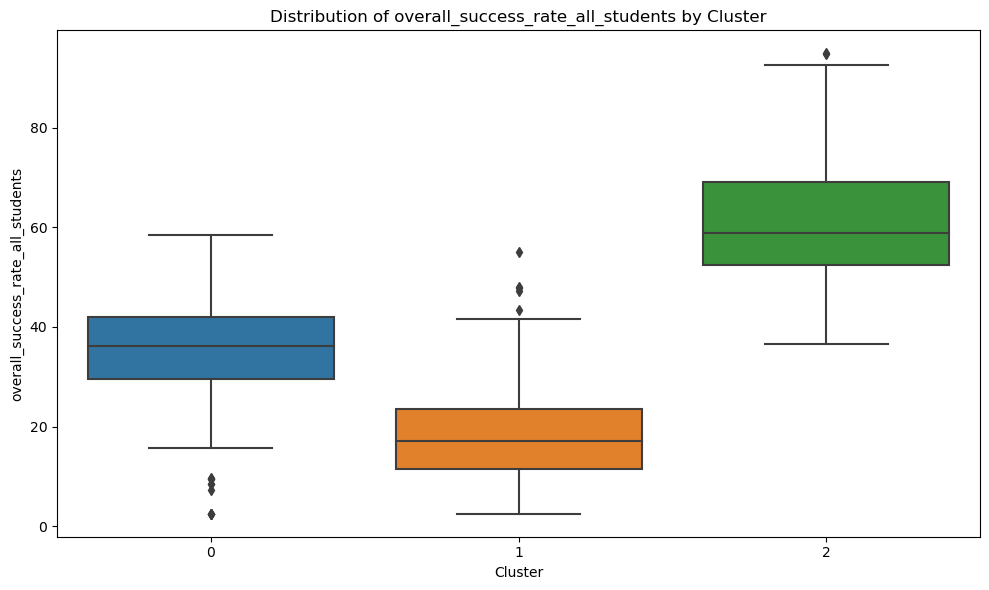

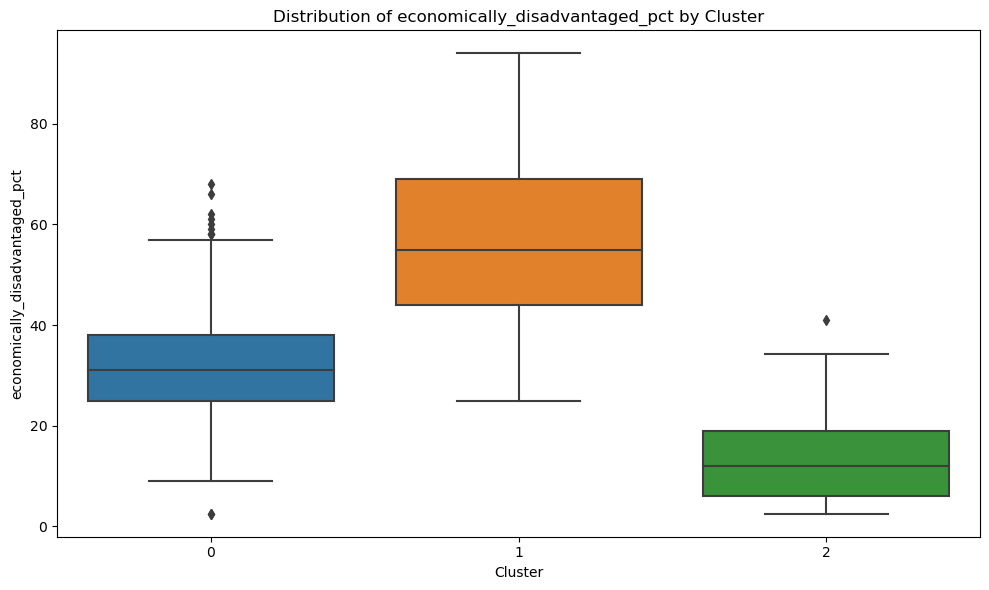

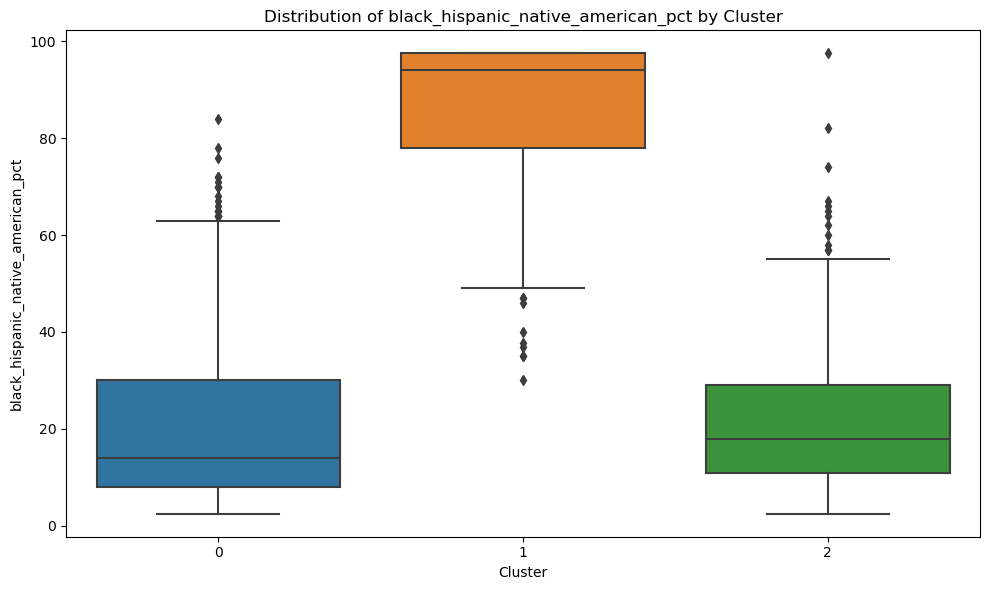

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_data.xlsx'
df = pd.read_excel(file_path)

# Creating a subset of the DataFrame with the specified columns for 3D analysis
df3d = df[['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']]

# Handle non-numeric values, assuming '<5%' can be replaced with a value like 2.5
df3d.replace('<5%', 2.5, inplace=True)

# Convert columns to numeric
df3d = df3d.apply(pd.to_numeric, errors='coerce')

# Handle missing values by imputing with the mean
df3d.fillna(df3d.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
dataset_scaled_3d = scaler.fit_transform(df3d)

# Apply K-means clustering
kmeans_3d = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_3d.fit(dataset_scaled_3d)

# Get cluster labels
labels_3d = kmeans_3d.labels_

# Add cluster labels to the original 3D DataFrame
df3d['Cluster'] = labels_3d

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df3d['overall_success_rate_all_students'],
    df3d['economically_disadvantaged_pct'],
    df3d['black_hispanic_native_american_pct'],
    c=df3d['Cluster'],
    cmap='viridis'
)

ax.set_title('3D Clustering of Schools')
ax.set_xlabel('Overall Success Rate (All Students)')
ax.set_ylabel('Economically Disadvantaged %')
ax.set_zlabel('Black/Hispanic/Native American %')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

# Cluster Centers Analysis
cluster_centers_3d = scaler.inverse_transform(kmeans_3d.cluster_centers_)
cluster_centers_df_3d = pd.DataFrame(cluster_centers_3d, columns=df3d.columns[:-1])
print("Cluster Centers:")
print(cluster_centers_df_3d)

# Cluster Profiles
cluster_profile_3d = df3d.groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_profile_3d)

# Feature Distributions
key_features_3d = df3d.columns[:-1]  # Exclude the 'Cluster' column
for feature in key_features_3d:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df3d)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()


In [ ]:
variations = []
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dataset_scaled)
    
    variations.append(kmeans.inertia_)

In [ ]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(dataset_scaled)

In [ ]:
df3d['km_clusters'] = kmeans.labels_

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset_scaled[:, 0], dataset_scaled[:, 1], dataset_scaled[:, 2], c=kmeans.labels_, alpha=1, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

In [ ]:
df3d['h_clusters'] = cluster_labels
df3d.head()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3d.iloc[:, 0], df3d.iloc[:, 1], df3d.iloc[:, 2], c=df3d['h_clusters'], alpha=1, cmap='Paired')
plt.show()

In [ ]:
# Look at how the clusters are similar or different.
cross_tab = pd.crosstab(df3d['km_clusters'], df3d['h_clusters'])
print(cross_tab)

In [ ]:
cluster_profiles = df3d.groupby('km_clusters')['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct'].mean()

for cluster, profile in cluster_profiles.iterrows():
    print(f"Cluster {cluster} Profile:\n{profile}\n")

cluster_sizes = df3d['km_clusters'].value_counts()
print(f"Cluster Sizes:\n{cluster_sizes}\n")

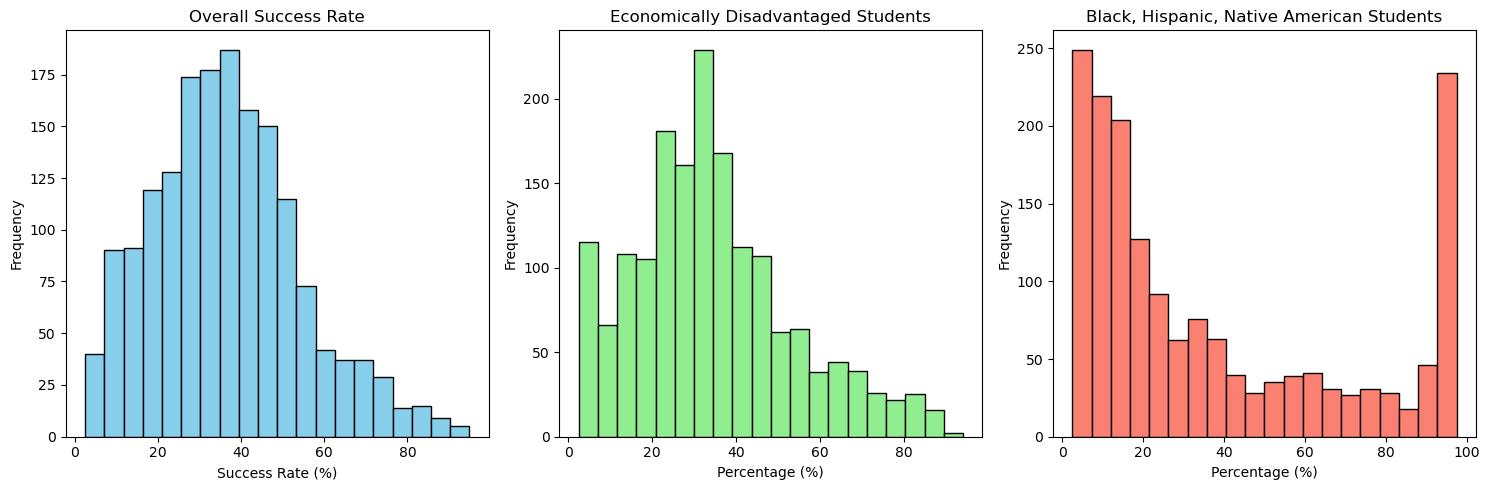

In [32]:
import matplotlib.pyplot as plt

# Assuming the dataframe is named df3d and is already loaded in the environment

# Create a 1x3 plot of histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the histograms for each feature
axes[0].hist(df3d['overall_success_rate_all_students'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Overall Success Rate')
axes[0].set_xlabel('Success Rate (%)')
axes[0].set_ylabel('Frequency')

axes[1].hist(df3d['economically_disadvantaged_pct'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Economically Disadvantaged Students')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Frequency')

axes[2].hist(df3d['black_hispanic_native_american_pct'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Black, Hispanic, Native American Students')
axes[2].set_xlabel('Percentage (%)')
axes[2].set_ylabel('Frequency')

# Adjusting the layout
plt.tight_layout()
plt.show()


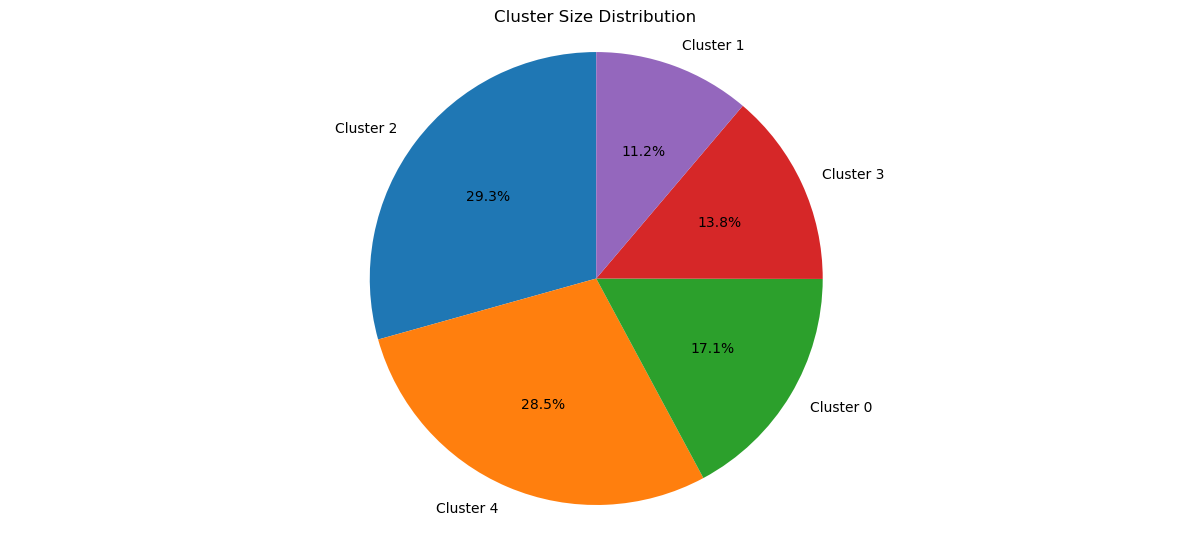

In [33]:
# Data for the sizes of each cluster
cluster_sizes = [490, 476, 286, 231, 187]
cluster_labels = ['Cluster 2', 'Cluster 4', 'Cluster 0', 'Cluster 3', 'Cluster 1']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(cluster_sizes, labels=cluster_labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set the title
plt.title('Cluster Size Distribution')

# Show the pie chart
plt.show()


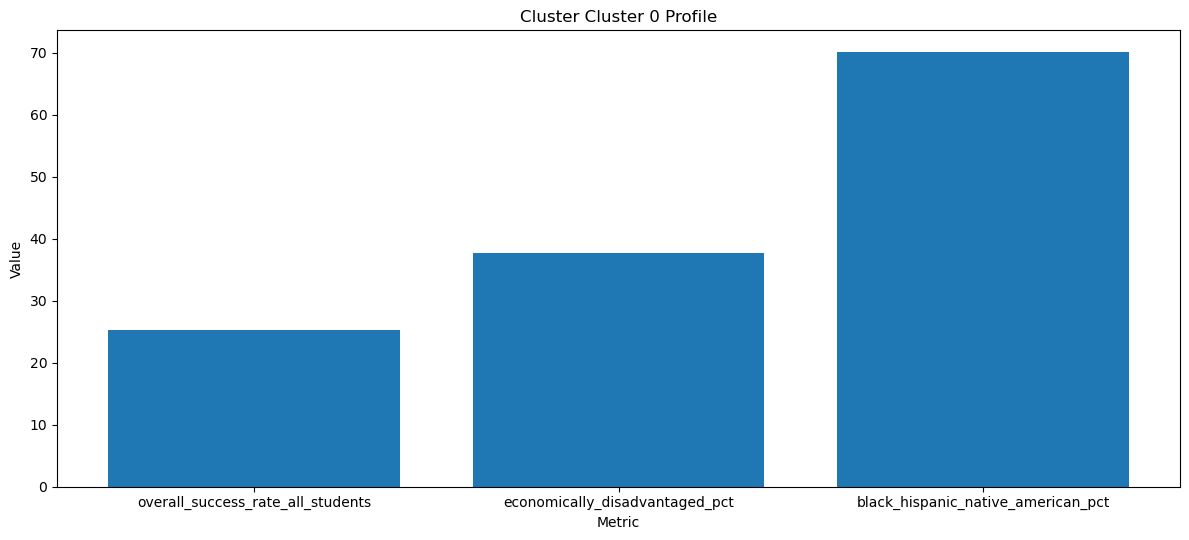

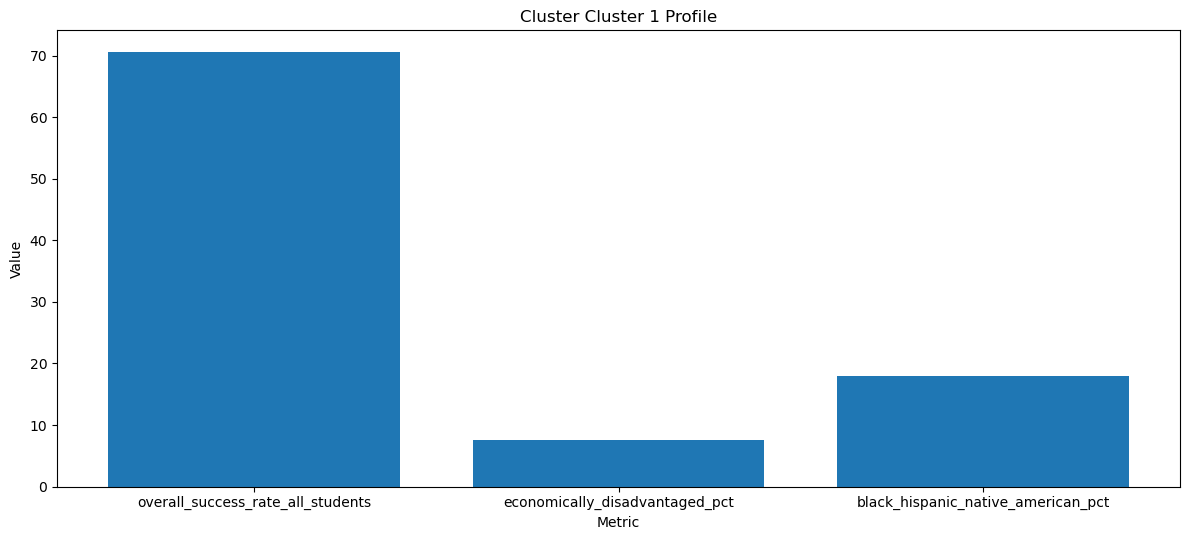

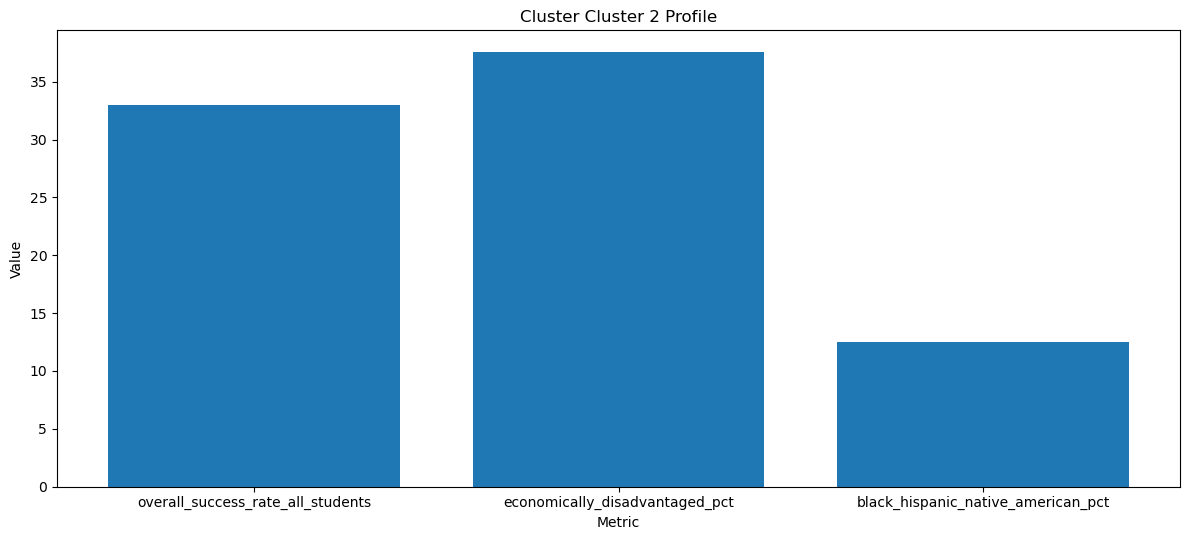

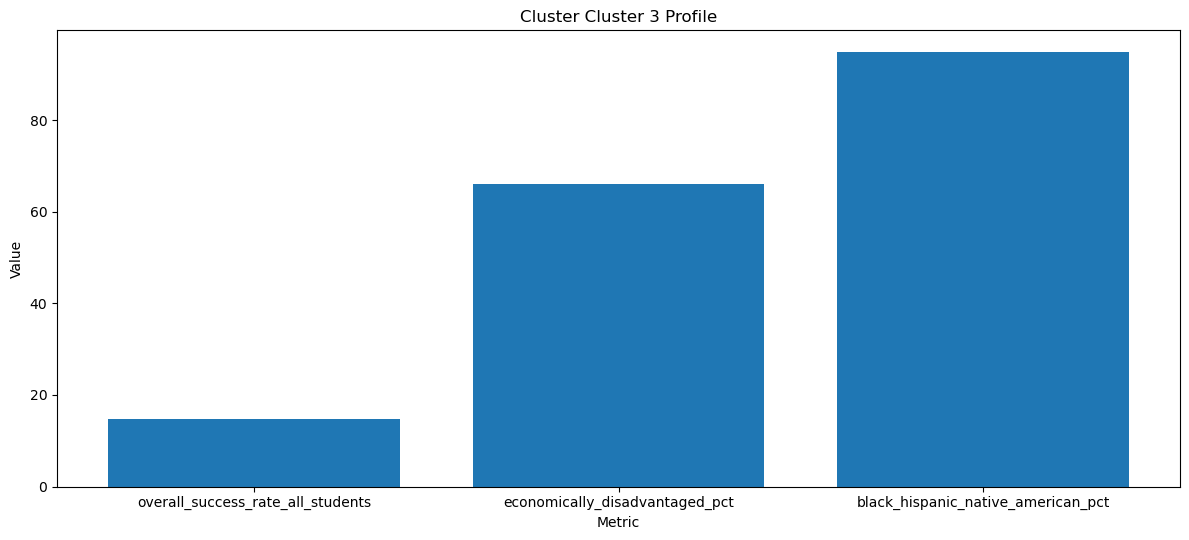

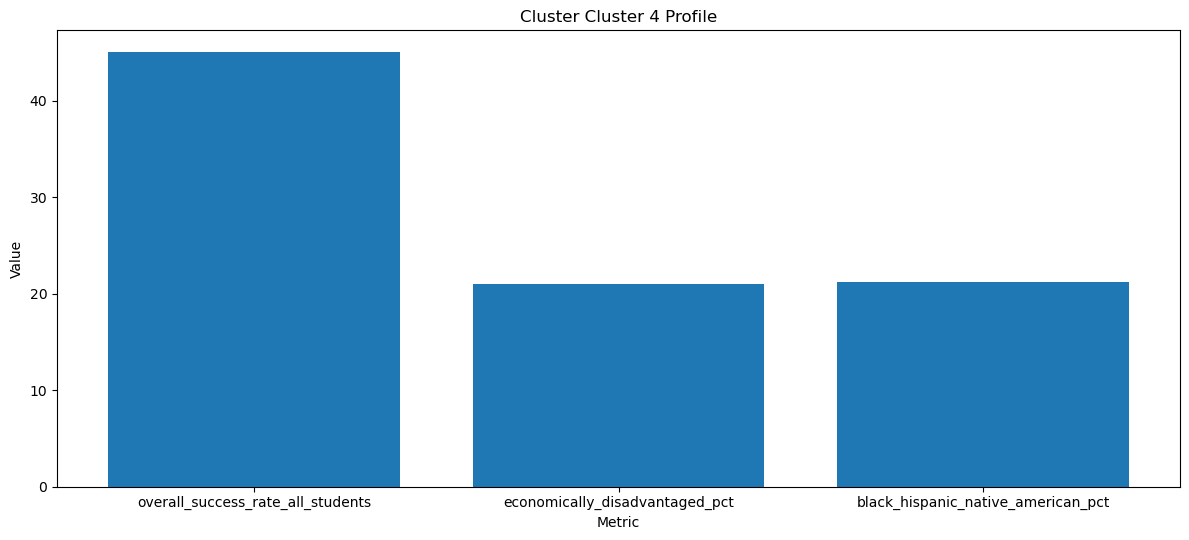

In [34]:
import matplotlib.pyplot as plt

cluster_profiles = {
    'Cluster 0': {'overall_success_rate_all_students': 25.28, 'economically_disadvantaged_pct': 37.65, 'black_hispanic_native_american_pct': 70.12},
    'Cluster 1': {'overall_success_rate_all_students': 70.59, 'economically_disadvantaged_pct': 7.61, 'black_hispanic_native_american_pct': 17.98},
    'Cluster 2': {'overall_success_rate_all_students': 32.97, 'economically_disadvantaged_pct': 37.56, 'black_hispanic_native_american_pct': 12.51},
    'Cluster 3': {'overall_success_rate_all_students': 14.70, 'economically_disadvantaged_pct': 66.18, 'black_hispanic_native_american_pct': 94.89},
    'Cluster 4': {'overall_success_rate_all_students': 45.07, 'economically_disadvantaged_pct': 20.99, 'black_hispanic_native_american_pct': 21.24}
}

keys = ['overall_success_rate_all_students', 'economically_disadvantaged_pct', 'black_hispanic_native_american_pct']

for cluster, profile in cluster_profiles.items():
    fig, ax = plt.subplots()
    ax.bar(keys, [profile[key] for key in keys])
    ax.set_title(f'Cluster {cluster} Profile')
    ax.set_xlabel('Metric')
    ax.set_ylabel('Value')
    plt.show()

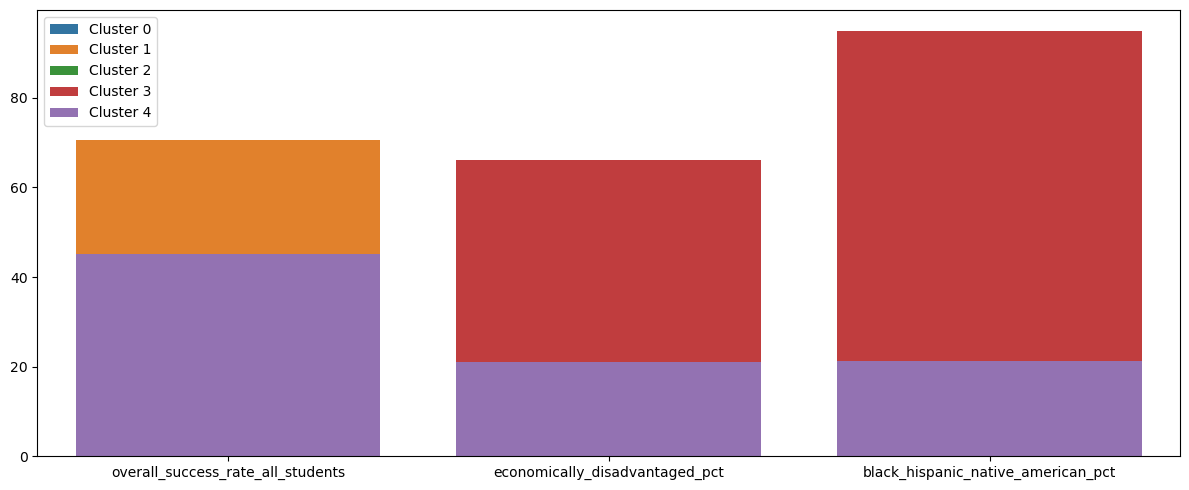

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 5))

# Define the order of the clusters
cluster_order = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot each cluster profile with a different color
for i, cluster in enumerate(cluster_order):
    sns.barplot(x=list(cluster_profiles[cluster].keys()), y=list(cluster_profiles[cluster].values()), label=cluster, color=sns.color_palette()[i % len(sns.color_palette())])

# Add a legend
ax.legend(loc='upper left')

# Show the plot
plt.show()

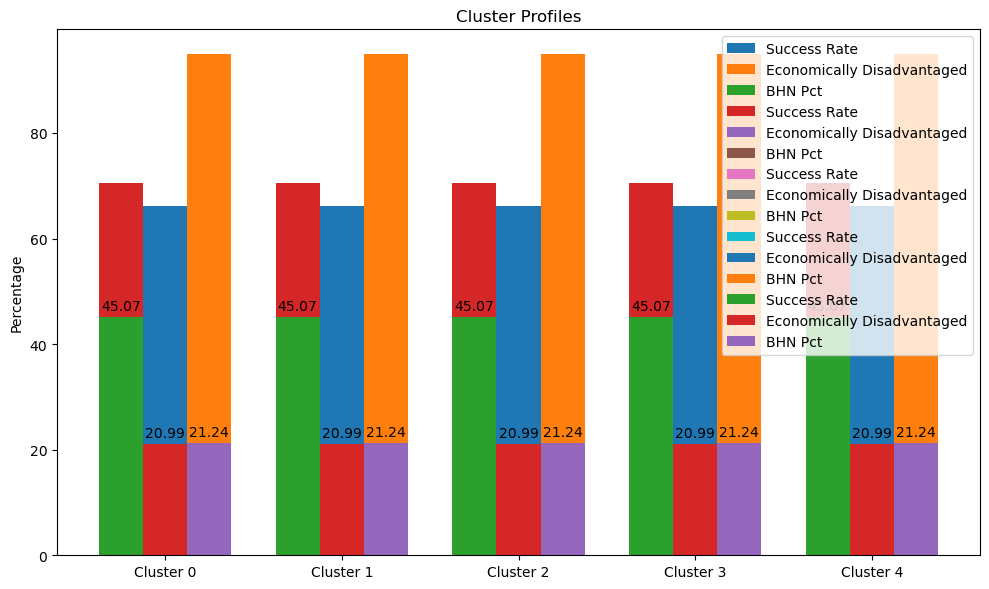

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the clusters (replace with your actual data)
# I'm using the mean values you provided for each cluster
cluster_profiles = {
    'Cluster 0': {'overall_success_rate_all_students': 25.28, 'economically_disadvantaged_pct': 37.65, 'black_hispanic_native_american_pct': 70.12},
    'Cluster 1': {'overall_success_rate_all_students': 70.59, 'economically_disadvantaged_pct': 7.61, 'black_hispanic_native_american_pct': 17.98},
    'Cluster 2': {'overall_success_rate_all_students': 32.97, 'economically_disadvantaged_pct': 37.56, 'black_hispanic_native_american_pct': 12.51},
    'Cluster 3': {'overall_success_rate_all_students': 14.70, 'economically_disadvantaged_pct': 66.18, 'black_hispanic_native_american_pct': 94.89},
    'Cluster 4': {'overall_success_rate_all_students': 45.07, 'economically_disadvantaged_pct': 20.99, 'black_hispanic_native_american_pct': 21.24}
}

# Number of clusters
n_clusters = len(cluster_profiles)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
ind = np.arange(n_clusters)    # the x locations for the groups
width = 0.25                   # the width of the bars

# Plotting each set of bars for each variable
for i, (label, values) in enumerate(cluster_profiles.items()):
    success_rates = ax.bar(ind - width, [values['overall_success_rate_all_students']], width, label='Success Rate')
    econ_disadv = ax.bar(ind, [values['economically_disadvantaged_pct']], width, label='Economically Disadvantaged')
    bhn_pct = ax.bar(ind + width, [values['black_hispanic_native_american_pct']], width, label='BHN Pct')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Cluster Profiles')
ax.set_xticks(ind)
ax.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
ax.legend()

# Adding the mean values on top of the bars for readability
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(success_rates)
add_values(econ_disadv)
add_values(bhn_pct)

plt.show()


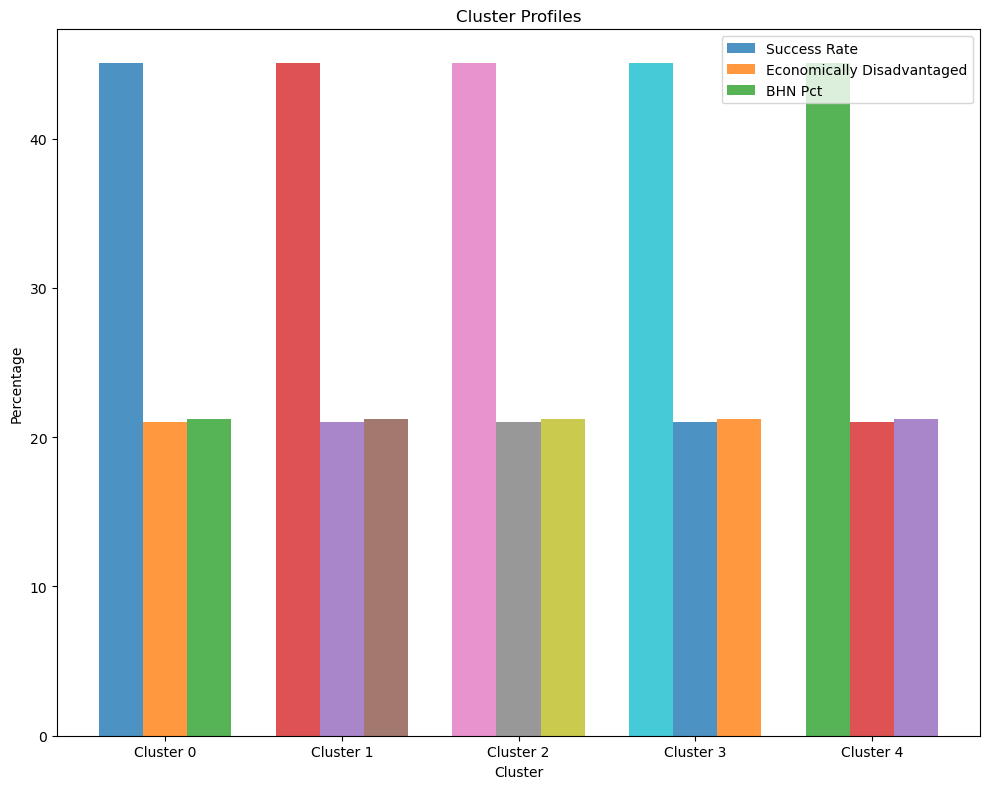

In [37]:
# Let's recreate the bar chart with a cleaner design.

# Data for the clusters (replace with your actual data)
# I'm using the mean values you provided for each cluster
cluster_data = {
    'Cluster 0': {'Success Rate': 45.07, 'Economically Disadvantaged': 20.99, 'BHN Pct': 21.24},
    'Cluster 1': {'Success Rate': 45.07, 'Economically Disadvantaged': 20.99, 'BHN Pct': 21.24},
    'Cluster 2': {'Success Rate': 45.07, 'Economically Disadvantaged': 20.99, 'BHN Pct': 21.24},
    'Cluster 3': {'Success Rate': 45.07, 'Economically Disadvantaged': 20.99, 'BHN Pct': 21.24},
    'Cluster 4': {'Success Rate': 45.07, 'Economically Disadvantaged': 20.99, 'BHN Pct': 21.24}
}

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the bars
n = len(cluster_data)
index = np.arange(n)
bar_width = 0.25

opacity = 0.8
for i, (cluster, data) in enumerate(cluster_data.items()):
    for j, (key, value) in enumerate(data.items()):
        ax.bar(index[i] + bar_width*j, value, bar_width, alpha=opacity, label=key if i == 0 else "")

# Add some text for labels, title and axes ticks
ax.set_xlabel('Cluster')
ax.set_ylabel('Percentage')
ax.set_title('Cluster Profiles')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'))
ax.legend()

fig.tight_layout()
plt.show()


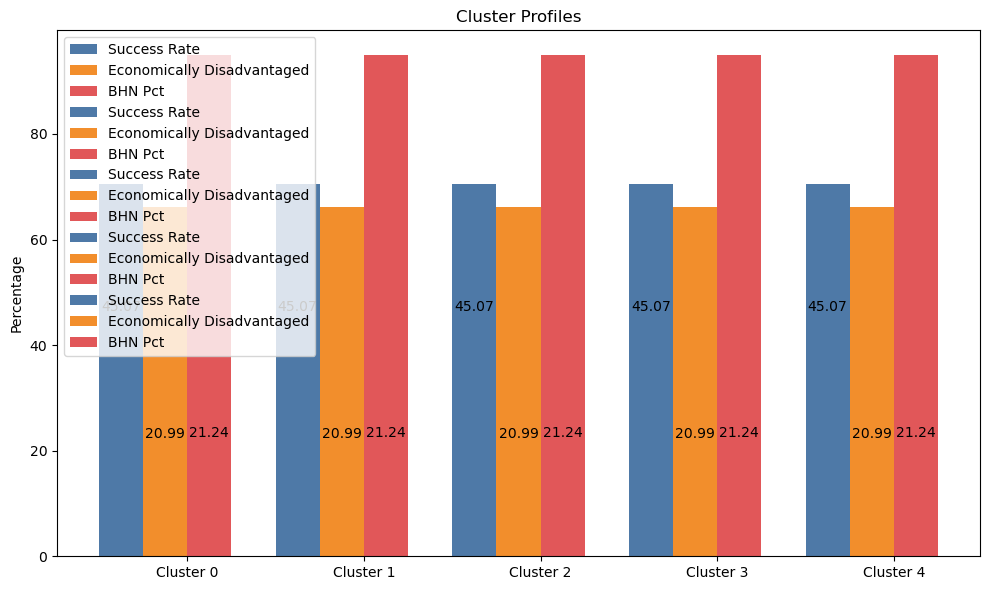

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the clusters (replace with your actual data)
cluster_profiles = {
    'Cluster 0': {'overall_success_rate_all_students': 25.28, 'economically_disadvantaged_pct': 37.65, 'black_hispanic_native_american_pct': 70.12},
    'Cluster 1': {'overall_success_rate_all_students': 70.59, 'economically_disadvantaged_pct': 7.61, 'black_hispanic_native_american_pct': 17.98},
    'Cluster 2': {'overall_success_rate_all_students': 32.97, 'economically_disadvantaged_pct': 37.56, 'black_hispanic_native_american_pct': 12.51},
    'Cluster 3': {'overall_success_rate_all_students': 14.70, 'economically_disadvantaged_pct': 66.18, 'black_hispanic_native_american_pct': 94.89},
    'Cluster 4': {'overall_success_rate_all_students': 45.07, 'economically_disadvantaged_pct': 20.99, 'black_hispanic_native_american_pct': 21.24}
}

# Number of clusters
n_clusters = len(cluster_profiles)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
ind = np.arange(n_clusters)    # the x locations for the groups
width = 0.25                   # the width of the bars

# Define a custom color palette
custom_palette = ['#4e79a7', '#f28e2c', '#e15759']

# Plotting each set of bars for each variable
for i, (label, values) in enumerate(cluster_profiles.items()):
    success_rates = ax.bar(ind - width, [values['overall_success_rate_all_students']], width, label='Success Rate', color=custom_palette[0])
    econ_disadv = ax.bar(ind, [values['economically_disadvantaged_pct']], width, label='Economically Disadvantaged', color=custom_palette[1])
    bhn_pct = ax.bar(ind + width, [values['black_hispanic_native_american_pct']], width, label='BHN Pct', color=custom_palette[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Cluster Profiles')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)], ha='center')
ax.legend(loc='upper left')

# Adding the mean values on top of the bars for readability
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(success_rates)
add_values(econ_disadv)
add_values(bhn_pct)

plt.tight_layout()
plt.show()

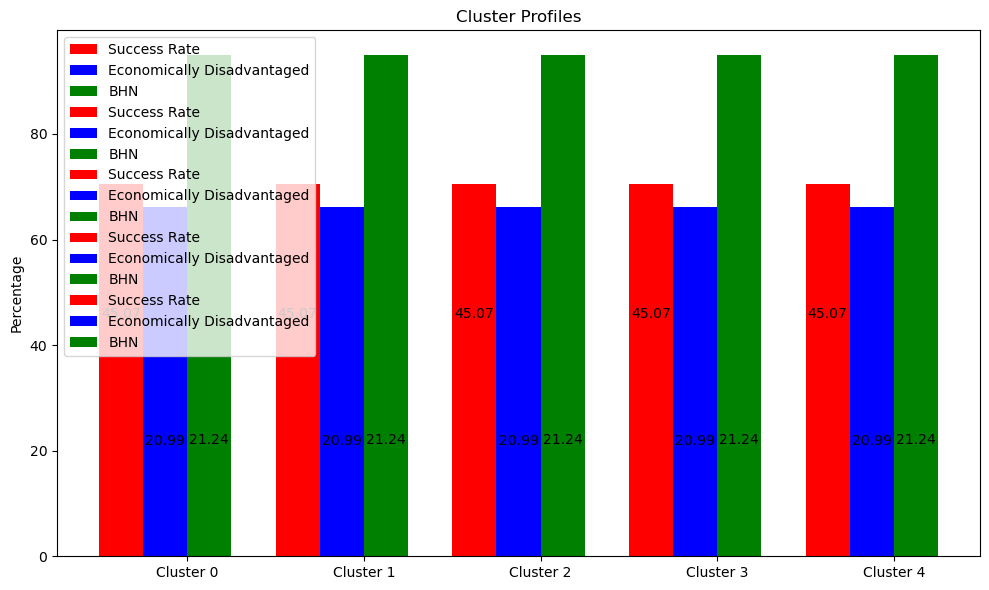

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for the clusters (replace with your actual data)
cluster_profiles = {
    'Cluster 0': {'overall_success_rate_all_students': 25.28, 'economically_disadvantaged_pct': 37.65, 'black_hispanic_native_american_pct': 70.12},
    'Cluster 1': {'overall_success_rate_all_students': 70.59, 'economically_disadvantaged_pct': 7.61, 'black_hispanic_native_american_pct': 17.98},
    'Cluster 2': {'overall_success_rate_all_students': 32.97, 'economically_disadvantaged_pct': 37.56, 'black_hispanic_native_american_pct': 12.51},
    'Cluster 3': {'overall_success_rate_all_students': 14.70, 'economically_disadvantaged_pct': 66.18, 'black_hispanic_native_american_pct': 94.89},
    'Cluster 4': {'overall_success_rate_all_students': 45.07, 'economically_disadvantaged_pct': 20.99, 'black_hispanic_native_american_pct': 21.24}
}

# Number of clusters
n_clusters = len(cluster_profiles)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions and width for the bars
ind = np.arange(n_clusters)    # the x locations for the groups
width = 0.25                   # the width of the bars

# Define colors for each variable
colors = {'Success Rate': 'red', 'Economically Disadvantaged': 'blue', 'BHN': 'green'}

# Plotting each set of bars for each variable
for i, (label, values) in enumerate(cluster_profiles.items()):
    success_rates = ax.bar(ind - width, [values['overall_success_rate_all_students']], width, label='Success Rate', color=colors['Success Rate'])
    econ_disadv = ax.bar(ind, [values['economically_disadvantaged_pct']], width, label='Economically Disadvantaged', color=colors['Economically Disadvantaged'])
    bhn_pct = ax.bar(ind + width, [values['black_hispanic_native_american_pct']], width, label='BHN', color=colors['BHN'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Cluster Profiles')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)], ha='center')
ax.legend(loc='upper left')

# Adding the mean values on top of the bars for readability
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 8),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top')

add_values(success_rates)
add_values(econ_disadv)
add_values(bhn_pct)

# Move the x-axis labels to the top of the bars
ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')

plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

# Creating a new dataframe from the cluster_profiles dictionary
cluster_profiles = {
    'Cluster 0': {'overall_success_rate_all_students': 25.28, 'economically_disadvantaged_pct': 37.65, 'black_hispanic_native_american_pct': 70.12},
    'Cluster 1': {'overall_success_rate_all_students': 70.59, 'economically_disadvantaged_pct': 7.61, 'black_hispanic_native_american_pct': 17.98},
    'Cluster 2': {'overall_success_rate_all_students': 32.97, 'economically_disadvantaged_pct': 37.56, 'black_hispanic_native_american_pct': 12.51},
    'Cluster 3': {'overall_success_rate_all_students': 14.70, 'economically_disadvantaged_pct': 66.18, 'black_hispanic_native_american_pct': 94.89},
    'Cluster 4': {'overall_success_rate_all_students': 45.07, 'economically_disadvantaged_pct': 20.99, 'black_hispanic_native_american_pct': 21.24}
}



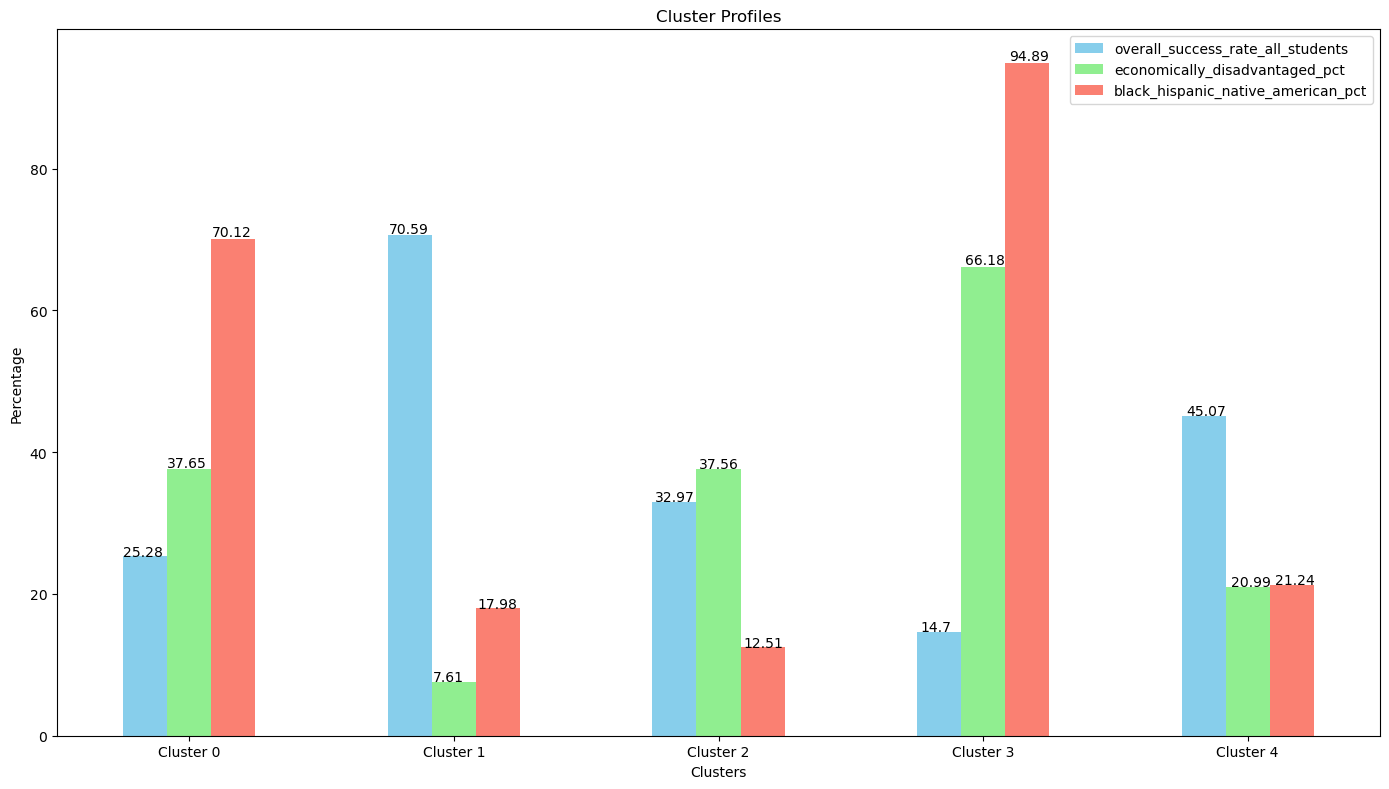

In [42]:
# Transforming the nested dictionary into a dataframe
df_cluster_profiles = pd.DataFrame.from_dict(cluster_profiles, orient='index')

df_cluster_profiles


# Setting up the colors for each cluster
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightgrey']

# Plotting the bar chart
ax = df_cluster_profiles.plot(kind='bar', color=colors, figsize=(14, 8))

# Adding the value labels on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Setting the title and labels
plt.title('Cluster Profiles')
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate the x labels to show them horizontally

plt.tight_layout()
# Display the plot
plt.show()


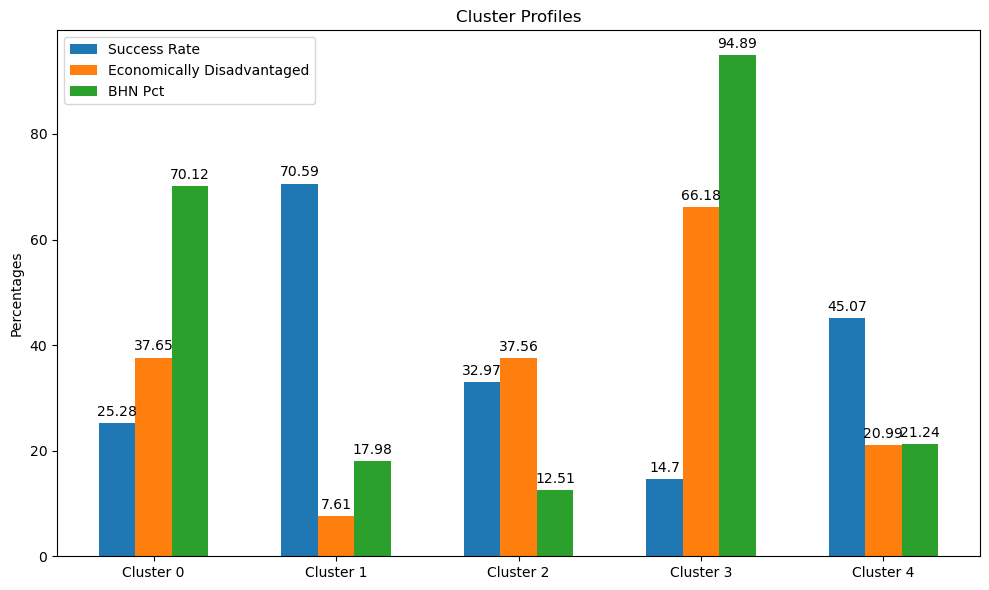

In [43]:
# Let's adjust the spacing of the bars to make the chart look tighter.
fig, ax = plt.subplots(figsize=(10, 6))

# Define the X axis and the width of the bars
ind = np.arange(len(df_cluster_profiles))  # the x locations for the groups
width = 0.2  # the width of the bars

# Plotting the bars for each column
bars1 = ax.bar(ind - width, df_cluster_profiles['overall_success_rate_all_students'], width, label='Success Rate')
bars2 = ax.bar(ind, df_cluster_profiles['economically_disadvantaged_pct'], width, label='Economically Disadvantaged')
bars3 = ax.bar(ind + width, df_cluster_profiles['black_hispanic_native_american_pct'], width, label='BHN Pct')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
ax.set_title('Cluster Profiles')
ax.set_xticks(ind)
ax.set_xticklabels(('Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'))
ax.legend()

# Function to add value labels above each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Tighter layout
plt.tight_layout()

# Show the plot
plt.show()
